In [1]:
import pandas as pd
import glob

In [2]:
fns_1 = glob.glob('/data/bias_task/raw/ds-01/behavior/S*_log_bias.txt')
fns_2 = glob.glob('/data/bias_task/raw/ds-02/behavior/S*_log_STNREP_dot_bias_fmri*.txt')

In [3]:
import re
reg1 = re.compile('.*/S(?P<subject_id>[0-9]+)_log_bias.*\.txt')
reg2 = re.compile('.*/S(?P<subject_id>[0-9]+)_log_STNREP_.*\.txt')

df = []
for fn in fns_1:
    d = pd.read_table(fn, sep=',')
    d['subject_id'] = reg1.match(fn).group(1)
    d = d[d.correct.astype(str) != 'correct']
    d['ds'] = 'Leipzig'
    df.append(d)
    
for fn in fns_2:
    d = pd.read_table(fn, sep=',')
    d['subject_id'] = reg2.match(fn).group(1)
    d = d[d.correct.astype(str) != 'correct']
    d['ds'] = 'Amsterdam'
    df.append(d)
    
df = pd.concat(df, ignore_index=True)
df['correct'] = df['correct'].astype(float)
df['rt'] = df['rt'].astype(float)

In [5]:
df.ds.unique()

array(['Leipzig', 'Amsterdam'], dtype=object)

In [6]:
df['response'] = df.response.map({1:'left', 2:'right'})

In [7]:
import seaborn as sns

In [8]:
def get_cue_congruency(row):
    if row.cue == 'neutral':
        return 'neutral'
    elif row.stimulus == row.cue:
        return 'congruent'
    else:
        return 'incongruent'

In [9]:
df['cue congruency'] = df.apply(get_cue_congruency, 1)

In [10]:
df['response'] = df.correct.map({0:'error', 1:'correct'})

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


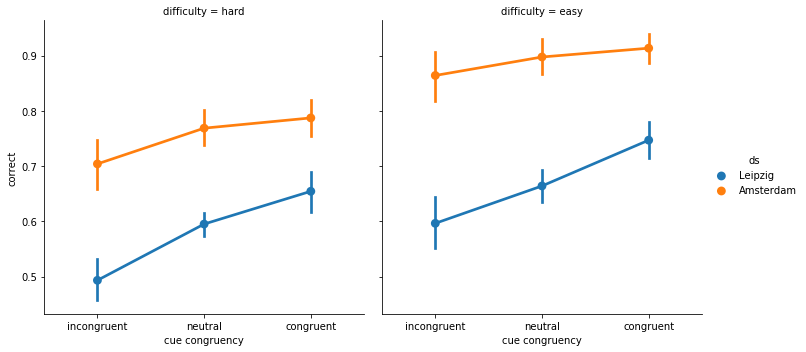

In [11]:
fac = sns.catplot('cue congruency', 
                  'correct', 
                  'ds',
                  col='difficulty', 
                  data=df, 
#                   row='ds', 
                  sharey=True, 
                  kind='point', 
                  units='subject_id', 
                  order=['incongruent', 'neutral', 'congruent'],
                  ci=67)

# fac.set(ylim=(600, 900))

In [12]:
df.groupby(['ds', 'coherence']).size()

ds         coherence
Amsterdam  0.15         2717
           0.35         2700
Leipzig    0.08         3586
           0.16         3586
dtype: int64

In [34]:
df.pivot_table(index=['ds', 'subject_id'], columns=['difficulty', 'cue congruency']).round(2)[['correct']]

correct                                            \
difficulty                easy                          hard               
cue congruency       congruent incongruent neutral congruent incongruent   
ds        subject_id                                                       
Amsterdam 01              0.88        0.98    0.94      0.73        0.88   
          02              1.00        0.96    0.95      0.79        0.65   
          03              0.73        0.65    0.69      0.58        0.50   
          05              0.88        0.85    0.77      0.88        0.56   
          06              0.94        0.98    1.00      0.85        0.79   
          07              1.00        0.94    0.94      0.80        0.98   
          08              1.00        1.00    1.00      0.84        0.95   
          09              0.96        0.90    0.95      0.92        0.73   
          10              0.92        0.92    0.96      0.75        0.75   
          11              0.94        0.98    0.98      0.90        0.75   
          12              0.75        0.73    0.80      0.54        0.52   
          13              1.00        0.83    0.96      0.79        0.58   
          14              0.81        0.38    0.65      0.75        0.44   
          15              1.00        0.97    0.98      0.87        0.82   
Leipzig   1               0.91        0.62    0.73      0.81        0.38   
          10              0.88        0.73    0.83      0.62        0.52   
          11              1.00        0.96    0.96      0.75        0.90   
          12              0.67        0.75    0.69      0.48        0.52   
          13              0.75        0.73    0.75      0.77        0.69   
          14              0.77        0.79    0.75      0.60        0.50   
          16              0.67        0.69    0.53      0.50        0.60   
          17              0.90        0.52    0.60      0.77        0.33   
          18              0.83        0.21    0.57      0.90        0.25   
          19              0.62        0.62    0.57      0.60        0.42   
          2               0.40        0.40    0.44      0.29        0.52   
          20              0.88        0.21    0.56      0.88        0.25   
          21              1.00        0.00     NaN      1.00         NaN   
          3               0.77        0.48    0.58      0.67        0.50   
          4               0.81        0.42    0.66      0.67        0.33   
          5               0.60        0.67    0.66      0.60        0.56   
          6               0.62        0.48    0.66      0.65        0.44   
          7               0.65        0.69    0.66      0.62        0.50   
          8               0.58        0.54    0.61      0.52        0.50   
          9               0.94        0.85    0.82      0.77        0.62   

                              
difficulty                    
cue congruency       neutral  
ds        subject_id          
Amsterdam 01            0.89  
          02            0.82  
          03            0.53  
          05            0.67  
          06            0.84  
          07            0.88  
          08            0.90  
          09            0.85  
          10            0.81  
          11            0.85  
          12            0.66  
          13            0.72  
          14            0.54  
          15            0.80  
Leipzig   1             0.62  
          10            0.71  
          11            0.80  
          12            0.60  
          13            0.65  
          14            0.62  
          16            0.56  
          17            0.52  
          18            0.55  
          19            0.53  
          2             0.50  
          20            0.52  
          21            1.00  
          3             0.57  
          4             0.58  
          5             0.51  
          6             0.65  
          7             0.59  
          8       

In [32]:
df.pivot_table(index=['ds', 'subject_id'], columns=['difficulty', 'cue congruency', 'correct']).round(2)[['rt']]

rt                                               \
difficulty                easy                                                
cue congruency       congruent         incongruent          neutral           
correct                    0.0     1.0         0.0     1.0      0.0     1.0   
ds        subject_id                                                          
Amsterdam 01            819.50  692.67      833.00  657.70  1032.33  662.10   
          02               NaN  560.17      713.00  595.48   717.00  569.85   
          03            768.31  821.83      903.71  862.16   904.53  807.44   
          05            936.17  699.69      905.14  720.07   936.45  666.74   
          06            661.33  564.64      569.00  564.26      NaN  596.09   
          07               NaN  518.92      645.00  545.47   653.75  581.52   
          08               NaN  515.04         NaN  551.84      NaN  530.03   
          09            681.50  632.07      962.60  663.53   807.00  657.56   
          10            947.00  687.50      414.00  732.16   809.00  708.64   
          11            477.00  556.53      377.00  556.09   222.00  529.82   
          12           1003.67  873.86      908.00  840.94   895.00  866.81   
          13               NaN  649.52      797.88  760.05   755.25  728.67   
          14            901.00  923.62      889.57  978.61   906.09  980.77   
          15               NaN  651.85      599.50  652.53   706.00  659.65   
Leipzig   1             875.33  841.38      970.00  887.50   938.24  868.26   
          10            602.17  830.98      822.69  894.14   949.25  899.14   
          11               NaN  719.52     1046.00  677.30   917.50  687.99   
          12            830.69  828.47      827.67  844.11   814.37  839.55   
          13            866.50  772.81      725.92  818.37   869.46  798.61   
          14           1021.82  867.70     1021.80  946.03  1072.88  934.25   
          16            885.19  940.31      999.13  937.18   863.82  859.84   
          17           1021.40  801.60      892.09  903.84   887.71  888.34   
          18            769.38  782.08      772.21  967.90   854.51  840.56   
          19            926.72  749.67      749.56  811.80   775.02  801.55   
          2             736.66  932.26      853.90  852.42   846.24  865.69   
          20            670.67  504.45      536.89  755.80   694.50  675.94   
          21               NaN  622.00       -1.00     NaN      NaN     NaN   
          3             835.27  635.35      593.32  797.52   722.88  718.07   
          4             986.33  882.77      872.18  876.75   903.00  853.63   
          5            1038.63  901.31      910.38  931.12   970.18  933.43   
          6             475.00  674.73      675.68  738.91   547.00  708.68   
          7             780.18  817.61      807.47  787.33   786.42  805.59   
          8             253.50  755.75      205.86  804.77   261.95  718.86   
          9             626.67  791.09      825.14  789.54   877.24  832.15   

                                                                               
difficulty                hard                                                 
cue congruency       congruent         incongruent           neutral           
correct                    0.0     1.0         0.0      1.0      0.0      1.0  
ds        subject_id                                                           
Amsterdam 01            851.62  744.54      668.17   739.62   826.00   769.31  
          02            803.60  615.76      539.94   645.55   802.06   605.81  
          03            873.30  812.46      853.79   903.21   841.58   847.35  
          05            853.33  833.95      822.52   804.33   865.59   764.92  
          06            812.00  688.54      777.80   685.84   611.00   664.79  
          07            504.40  657.35      526.00   664.69   647.50   624.25  
          08            974.50  696.38      986.50   696.03   831.

In [48]:
import numpy as np

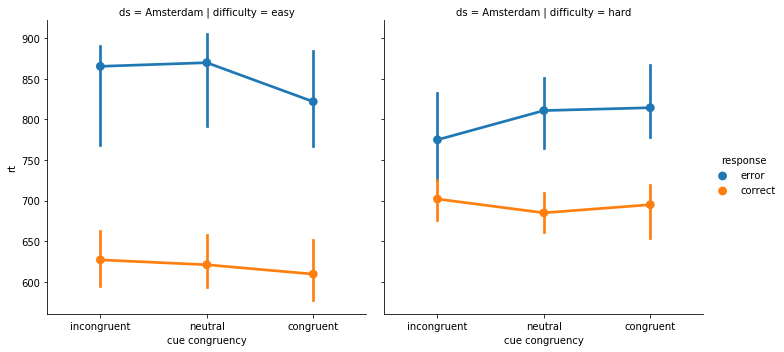

In [49]:
fac = sns.catplot('cue congruency', 
                  'rt', 
                  'response',
                  col='difficulty', 
                  data=df, 
                  row='ds', 
                  sharey=True, 
                  kind='point', 
                  estimator=np.median,
                  units='subject_id', 
                  order=['incongruent', 'neutral', 'congruent'],
                  col_order=['easy', 'hard'],
                  ci=67)

# fac.set(ylim=(600, 900))

In [23]:
df.head()

,block,trial_NR,cue_delay,stim_delay,cue,coherence,difficulty,stimulus,response,rt,correct,onset_cue,onset_stim,subject_id,ds,cue congruency
0,1,1,750,1750,neutral,0.08,hard,left,error,-1.0,0.0,6.75,9.5,10,Leipzig,neutral
1,1,2,0,1000,right,0.16,easy,left,error,720.0,0.0,15.00,17.0,10,Leipzig,incongruent
2,1,3,1500,1000,left,0.16,easy,left,correct,486.0,1.0,25.50,27.5,10,Leipzig,congruent
3,1,4,750,1750,neutral,0.16,easy,left,error,689.0,0.0,33.75,36.5,10,Leipzig,neutral
4,1,5,1500,1000,neutral,0.16,easy,left,correct,1339.0,1.0,43.50,45.5,10,Leipzig,neutral


In [24]:
df['uni_id'] = df.apply(lambda row: '{}-{}'.format(row.ds, row.subject_id), 1)

In [26]:
import numpy as np

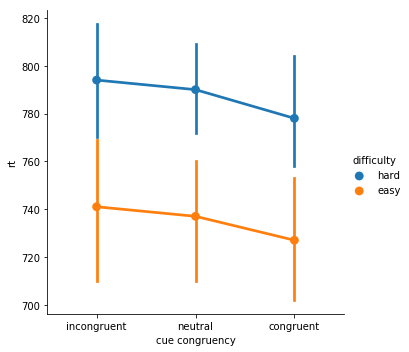

In [27]:
sns.catplot('cue congruency', 'rt', 'difficulty', kind='point', data=df, order=['incongruent', 'neutral', 'congruent'],
            estimator=np.median, units='uni_id', ci=67)

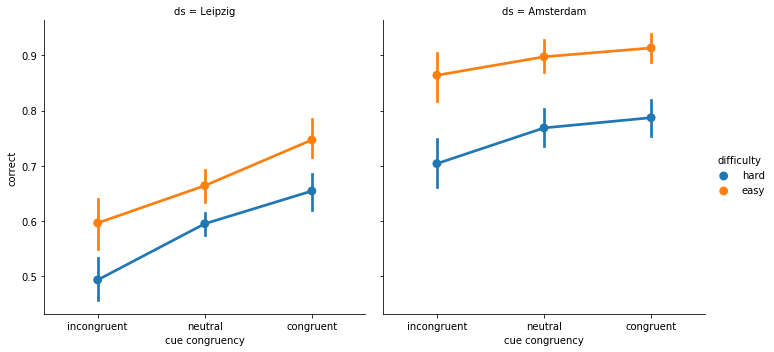

In [30]:
sns.factorplot('cue congruency', 'correct', 'difficulty', data=df, col='ds', order=['incongruent', 'neutral', 'congruent'], units='uni_id', ci=67)

/Users/gilles/miniconda3/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


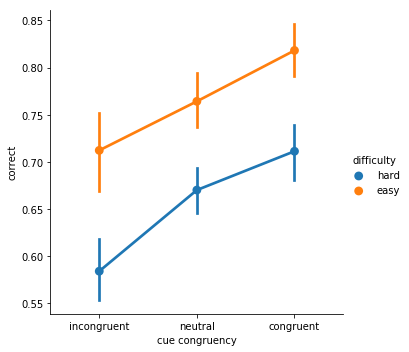

In [28]:
sns.factorplot('cue congruency', 'correct', 'difficulty', data=df, order=['incongruent', 'neutral', 'congruent'], units='uni_id', ci=67)

In [84]:
import hddm

In [85]:
df['rt'] = df['rt'] / 1000.

In [86]:
df['cue_regressor'] = df['cue congruency'].map({'congruent':1, 'neutral':0, 'incongruent':-1})

In [110]:
df['subj_idx'] = df['uni_id']

In [111]:
import numpy as np

In [112]:
from patsy import dmatrix  # for generation of (regression) design matrices


In [113]:
def z_link_func(x):
    return 1 / (1 + np.exp(-x))

In [114]:
df['response'] = df['correct']

In [117]:
df['ds_regressor'] = df['ds'].map({'Leipgiz':0, 'Amsterdam':1})

In [139]:
z_reg = {'model': 'z ~ 0 + cue_regressor', 'link_func': z_link_func}
v_reg = {'model': 'v ~ 0 + C(difficulty)', 'link_func':lambda x: x}

In [140]:
model = hddm.HDDMRegressor(df[df.rt > 0.15], [z_reg, v_reg], include='z', group_only_regressors=False)

Adding these covariates:
['z_cue_regressor']
Adding these covariates:
['v_C(difficulty)[easy]', 'v_C(difficulty)[hard]']


In [143]:
model.sample(500, 250)

 [-----------------100%-----------------] 501 of 500 complete in 1104.1 sec

Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting z_cue_regressor
Plotting v_C(difficulty)[easy]
Plotting v_C(difficulty)[easy]_std
Plotting v_C(difficulty)[hard]
Plotting v_C(difficulty)[hard]_std


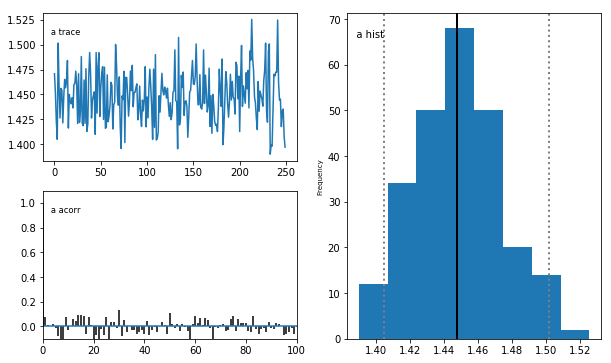

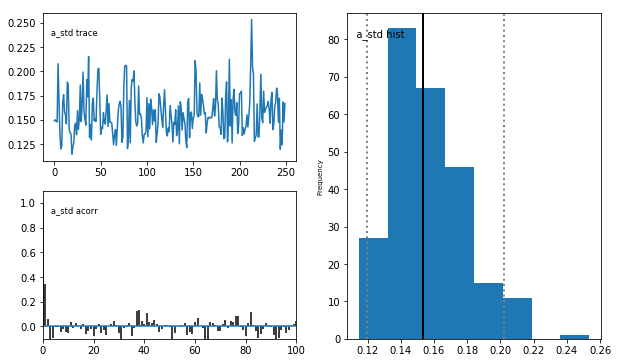

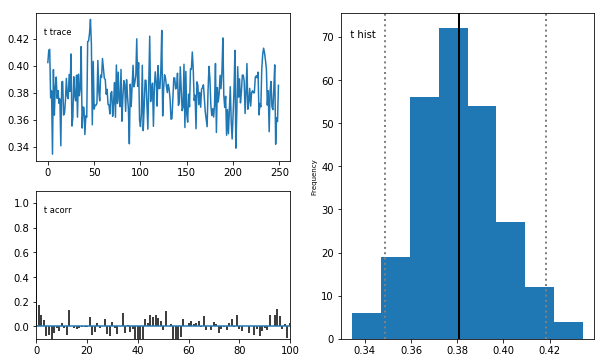

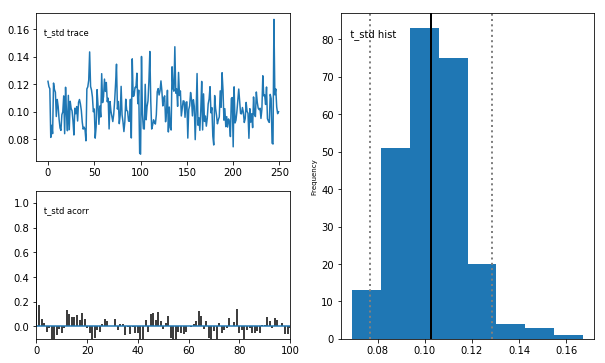

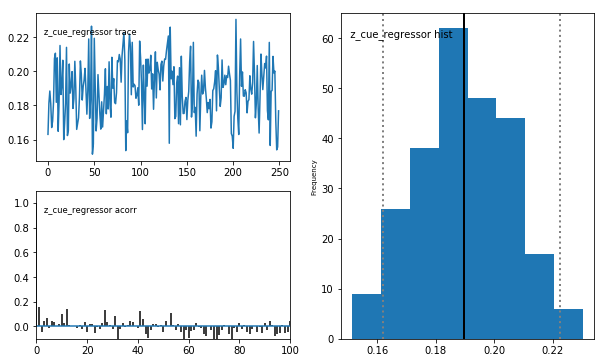

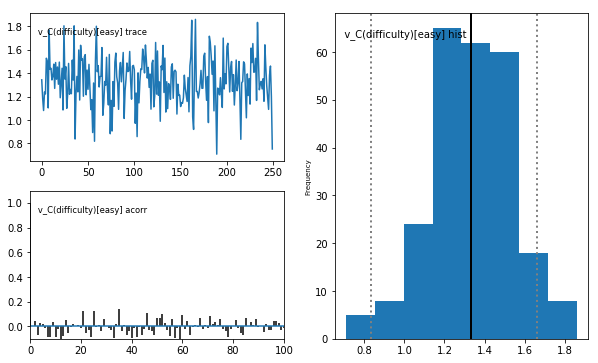

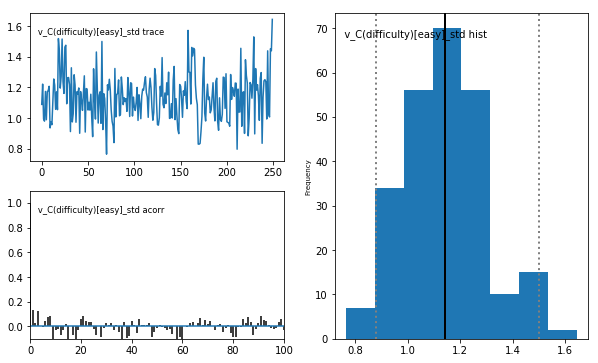

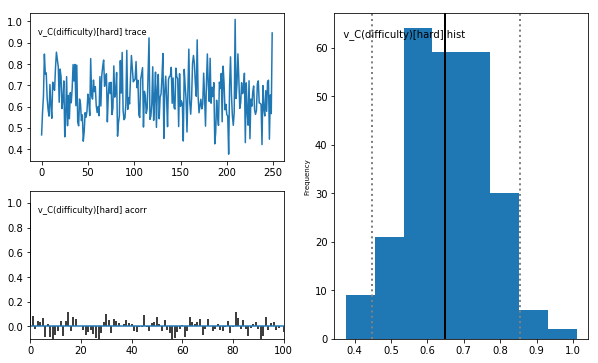

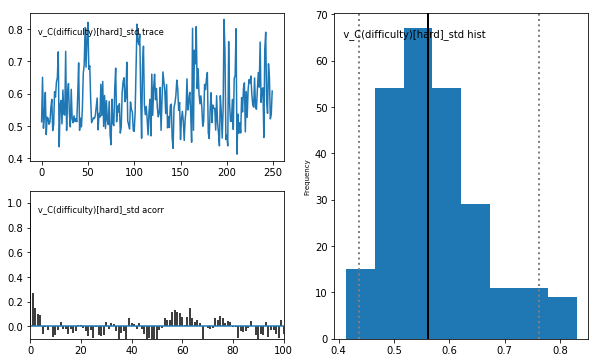

In [127]:
model.plot_posteriors()

In [130]:
mean_pars = model.get_traces().mean()

In [132]:
traces = model.get_traces()

In [ ]:
traces = traces.melt()

In [137]:
model.get_subj_nodes().knode_name.unique()

array(['a_subj', 't_subj', 'v_C(difficulty)[easy]_subj',
       'v_C(difficulty)[hard]_subj'], dtype=object)

In [138]:

traces[traces.variable.apply(lambda s: s.startswith(''))]

array(['a', 'a_std', 'a_subj.Amsterdam-01', 'a_subj.Amsterdam-02',
       'a_subj.Amsterdam-03', 'a_subj.Amsterdam-05',
       'a_subj.Amsterdam-06', 'a_subj.Amsterdam-07',
       'a_subj.Amsterdam-08', 'a_subj.Amsterdam-09',
       'a_subj.Amsterdam-10', 'a_subj.Amsterdam-11',
       'a_subj.Amsterdam-12', 'a_subj.Amsterdam-13',
       'a_subj.Amsterdam-14', 'a_subj.Amsterdam-15', 'a_subj.Leipzig-1',
       'a_subj.Leipzig-10', 'a_subj.Leipzig-11', 'a_subj.Leipzig-12',
       'a_subj.Leipzig-13', 'a_subj.Leipzig-14', 'a_subj.Leipzig-16',
       'a_subj.Leipzig-17', 'a_subj.Leipzig-18', 'a_subj.Leipzig-19',
       'a_subj.Leipzig-2', 'a_subj.Leipzig-20', 'a_subj.Leipzig-21',
       'a_subj.Leipzig-3', 'a_subj.Leipzig-4', 'a_subj.Leipzig-5',
       'a_subj.Leipzig-6', 'a_subj.Leipzig-7', 'a_subj.Leipzig-8',
       'a_subj.Leipzig-9', 't', 't_std', 't_subj.Amsterdam-01',
       't_subj.Amsterdam-02', 't_subj.Amsterdam-03',
       't_subj.Amsterdam-05', 't_subj.Amsterdam-06',
       't_su

In [131]:

mean_pars

a                                          1.448652
a_std                                      0.156501
a_subj.Amsterdam-01                        1.267288
a_subj.Amsterdam-02                        1.321902
a_subj.Amsterdam-03                        1.323804
a_subj.Amsterdam-05                        1.432289
a_subj.Amsterdam-06                        1.308546
a_subj.Amsterdam-07                        1.383494
a_subj.Amsterdam-08                        1.458650
a_subj.Amsterdam-09                        1.261209
a_subj.Amsterdam-10                        1.555090
a_subj.Amsterdam-11                        1.198100
a_subj.Amsterdam-12                        1.369515
a_subj.Amsterdam-13                        1.291629
a_subj.Amsterdam-14                        1.672695
a_subj.Amsterdam-15                        1.438295
a_subj.Leipzig-1                           1.350033
a_subj.Leipzig-10                          1.628540
a_subj.Leipzig-11                          1.432610
a_subj.Leipz

In [120]:
df = hddm.utils.post_pred_gen(model, samples=1)

 [--------------------------------------------------------------------------400%--------------------------------------------------------------------------] 4 of 1 complete in 31.6 sec

In [121]:
df

rt
node sample               
wfpt 0      0    -0.859884
            1    -0.953084
            2     1.082583
            3     0.468484
            4     0.390084
            5     0.468583
            6     0.725585
            7     0.857785
            8     0.793084
            9    -0.406484
            10    0.480684
            11    0.561783
            12    0.490084
            13    0.580684
            14   -0.493884
            15    1.067983
            16    0.586783
            17   -1.560385
            18    0.814684
            19    1.601284
            20    0.705084
            21    0.435585
            22    1.330884
            23    0.692484
            24   -1.467684
            25    0.715884
            26    1.216284
            27    0.537284
            28    1.080185
            29    0.628484
...                    ...
            5175  0.763785
            5176  0.645383
            5177  0.844484
            5178  0.489284
            5179  0.719983
            5180 -0.730985
            5181  1.398284
            5182  1.313884
            5183  0.503185
            5184  0.648585
            5185  0.956884
            5186  0.398684
            5187  0.416185
            5188  0.414084
            5189  0.578585
            5190  0.457383
            5191 -0.728284
            5192 -1.234884
            5193 -1.897983
            5194  0.440684
            5195  0.853983
            5196  1.274185
            5197  0.508785
            5198  0.450284
            5199  1.040783
            5200  0.432983
            5201  0.520785
            5202  0.639084
            5203  0.482185
            5204  0.717185

[5187 rows x 1 columns]

In [ ]:
model.a


In [118]:
model.plot_posterior_predictive()

<Figure size 576x432 with 0 Axes>

In [84]:
model = hddm.HDDM(df[df.rt > 0.15], depends_on={'v':'difficulty', 'z':'cue congruency'}, include='z')

In [78]:
model.sample(500, burn=250)

 [-----------------100%-----------------] 500 of 500 complete in 12.3 sec

Plotting a
Plotting v(easy)
Plotting v(hard)
Plotting t
Plotting z(congruent)
Plotting z(incongruent)
Plotting z(neutral)


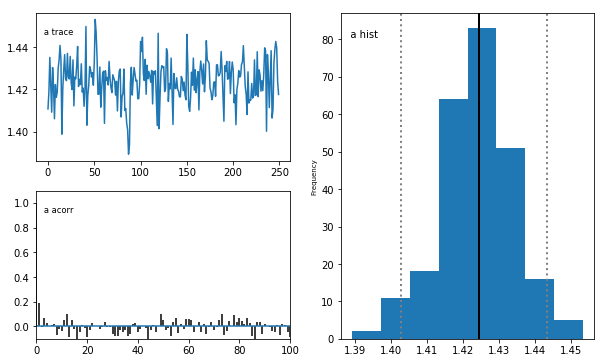

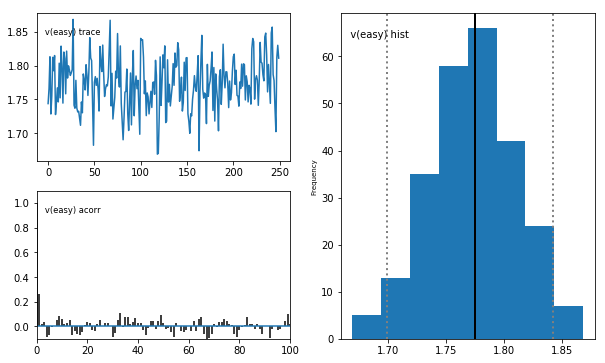

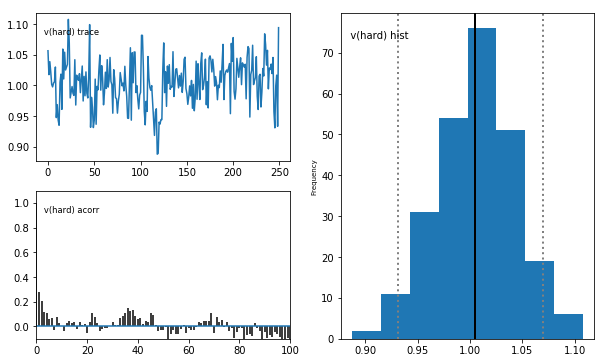

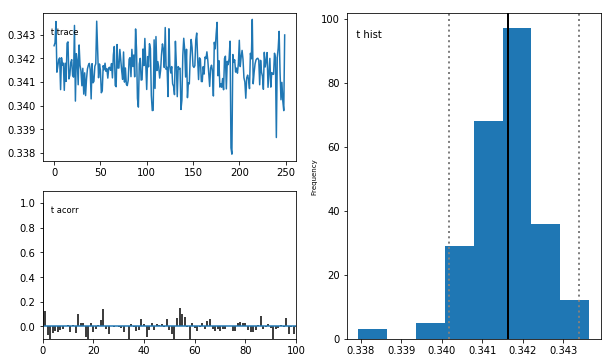

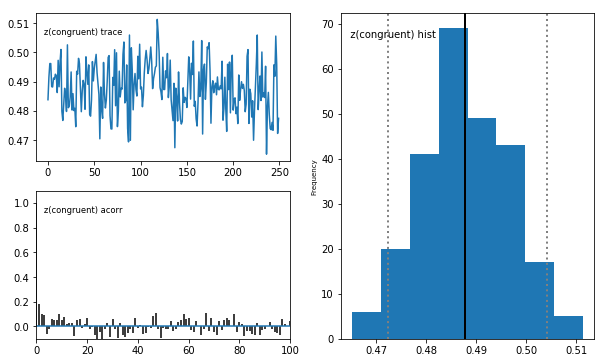

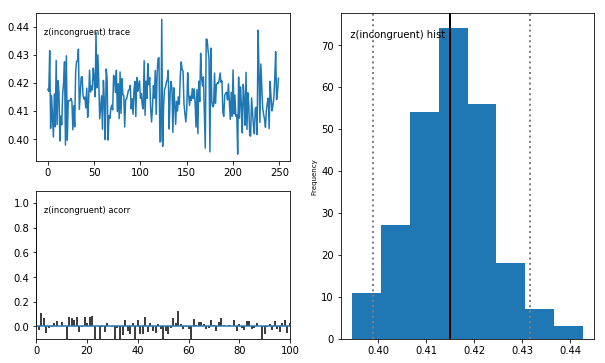

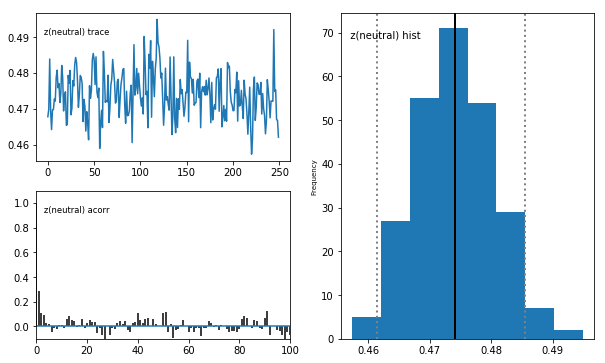

In [79]:
model.plot_posteriors()

Adding these covariates:
['z_Intercept', 'z_cue_regressor']


TypeError: 'int' object is not iterable

In [37]:
import hddm
from patsy import dmatrix  # for generation of (regression) design matrices
import numpy as np         # for basic matrix operations
from pandas import Series  # to manipulate data-frames generated by hddm

In [38]:
n_subjects = 10
trials_per_level = 150 # and per stimulus

In [39]:
level1a = {'v':.3, 'a':2, 't':.3, 'sv':0, 'z':.5, 'sz':0, 'st':0}
level2a = {'v':.4, 'a':2, 't':.3, 'sv':0, 'z':.6, 'sz':0, 'st':0}
level3a = {'v':.5, 'a':2, 't':.3, 'sv':0, 'z':.7, 'sz':0, 'st':0}

data_a, params_a = hddm.generate.gen_rand_data({'level1': level1a,
                                                'level2': level2a,
                                                'level3': level3a},
                                                size=trials_per_level,
                                                subjs=n_subjects)

level1b = {'v':.3, 'a':2, 't':.3,'sv': 0, 'z':.5, 'sz': 0, 'st': 0}
level2b = {'v':.4, 'a':2, 't':.3,'sv': 0, 'z':.4, 'sz': 0, 'st': 0}
level3b = {'v':.5, 'a':2, 't':.3,'sv': 0, 'z':.3, 'sz': 0, 'st': 0}

data_b, params_b = hddm.generate.gen_rand_data({'level1': level1b,
                                                'level2': level2b,
                                                'level3': level3b},
                                                size=trials_per_level,
                                                subjs=n_subjects)

data_a['stimulus'] = Series(np.ones((len(data_a))), index=data_a.index)
data_b['stimulus'] = Series(np.ones((len(data_b)))*2, index=data_a.index)

mydata = data_a.append(data_b, ignore_index=True)


In [40]:
def z_link_func(x, data=mydata):
    stim = (np.asarray(dmatrix('0 + C(s, [[1], [-1]])',
                               {'s': data.stimulus.ix[x.index]}))
    )
    return 1 / (1 + np.exp(-(x * stim)))

z_reg = {'model': 'z ~ 1 + C(condition)', 'link_func': z_link_func}


v_reg = {'model': 'v ~ 1 + C(condition)', 'link_func': lambda x: x}


reg_descr = [z_reg, v_reg]


m_reg = hddm.HDDMRegressor(mydata, reg_descr, include='z')


m_reg.sample(5000, burn=200)


Adding these covariates:
['z_Intercept', 'z_C(condition)[T.level2]', 'z_C(condition)[T.level3]']
Adding these covariates:
['v_Intercept', 'v_C(condition)[T.level2]', 'v_C(condition)[T.level3]']


/Users/gilles/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


 [                  0%                  ] 3 of 5000 complete in 13.3 secHalting at iteration  2  of  5000
Could not generate output statistics for t
Could not generate output statistics for a_subj.7
Could not generate output statistics for v_C(condition)[T.level3]
Could not generate output statistics for z_Intercept_subj.0
Could not generate output statistics for v_Intercept_subj.6
Could not generate output statistics for v_Intercept_subj.9
Could not generate output statistics for t_subj.5
Could not generate output statistics for v_Intercept_std
Could not generate output statistics for t_subj.8
Could not generate output statistics for v_Intercept_subj.5
Could not generate output statistics for t_subj.6
Could not generate output statistics for z_Intercept_subj_trans.6
Could not generate output statistics for a_std
Could not generate output statistics for v_Intercept_subj.7
Could not generate output statistics for z_Intercept_subj_trans.2
Could not generate output statistics for a_subj.6

TypeError: 'NoneType' object has no attribute '__getitem__'

In [70]:
(df.rt < 0.25).sum()

18

In [65]:
df.rt.max()

1.504

In [63]:
mydata

,rt,response,subj_idx,condition,stimulus
0,1.022154,1.0,0,level1,1.0
1,0.661333,1.0,0,level1,1.0
2,1.188684,1.0,0,level1,1.0
3,2.266974,1.0,0,level1,1.0
4,0.631883,1.0,0,level1,1.0
5,1.627511,0.0,0,level1,1.0
6,2.570856,1.0,0,level1,1.0
7,0.577689,1.0,0,level1,1.0
8,1.174839,0.0,0,level1,1.0
9,0.855727,0.0,0,level1,1.0


In [26]:
from nilearn import image

/Users/gilles/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  """Entry point for launching an IPython kernel.


In [38]:
gm = image.load_img('/data/odc/derivatives/manual_segmentation/sub-ns/ses-anat/anat/sub-ns_ses-anat_space-average_desc-gm_mask.nii.gz')
outside = image.load_img('/data/odc/derivatives/manual_segmentation/sub-ns/ses-anat/anat/sub-ns_ses-anat_space-average_desc-outside_mask.nii.gz')

In [39]:
(gm.get_data() + outside.get_data() == 2).sum()

19

In [40]:
import numpy as np

In [41]:
new_outside = image.math_img('outside - (gm+outside==2)', gm=gm, outside=outside)

In [42]:
new_outside.to_filename('/data/odc/derivatives/manual_segmentation/sub-ns/ses-anat/anat/sub-ns_ses-anat_space-average_desc-outside_mask_new.nii.gz')

In [43]:
(new_outside.get_data() == outside.get_data()).all()

False